In [10]:
from models.LR import LinearPredictor
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.6f}'.format
np.set_printoptions(precision=6, suppress=True)

In [11]:
# 创建实例
model = LinearPredictor()

# 加载数据
model.load_data('data/FeatureData/AAXJ.csv')

# 准备目标变量（预测 horizon 可调）
model.prepare_target(horizon=20)

# 用 2023 年训练
model.train(start_date='2023-01-01', end_date='2023-12-31')

# 用 2024 年 1 月做预测
c_hat, c_true, dates = model.predict(start_date='2024-01-01', end_date='2024-01-31')

# 打印前几项
print(c_hat)
print(c_true)


[ 0.000689  0.000639  0.000283 -0.000127  0.000199 -0.000616 -0.000828
  0.000073 -0.00084  -0.001975 -0.002671 -0.002476 -0.002561 -0.003063
 -0.002141 -0.001394 -0.00127  -0.001181 -0.000949 -0.0007  ]
[ 0.001196  0.001221  0.001221  0.001066  0.000538  0.000112  0.000393
  0.00018  -0.001814 -0.00234  -0.00178  -0.001614 -0.001155 -0.001729
 -0.00069  -0.001035 -0.001302 -0.001853 -0.002384 -0.00186 ]


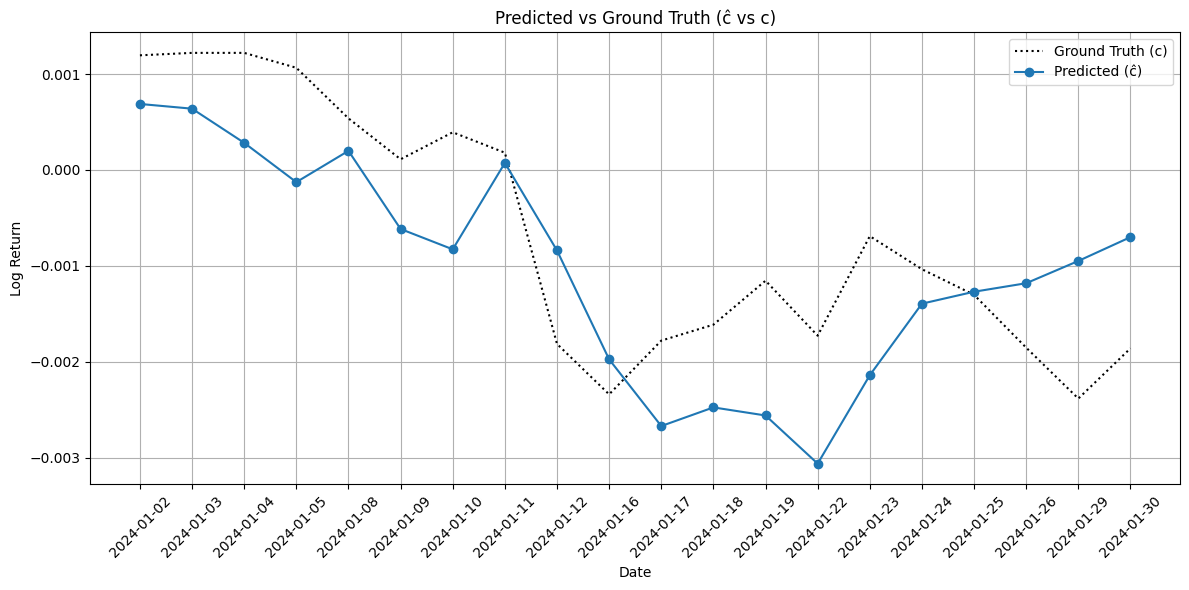

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(dates, c_true, label='Ground Truth (c)', color='black', linestyle='dotted')
plt.plot(dates, c_hat, label='Predicted (ĉ)', marker='o', linestyle='-')
plt.title("Predicted vs Ground Truth (ĉ vs c)")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()